# Ôn tập giữa kỳ


In [348]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2_contingency
import scipy.stats as stats

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [349]:
df = pd.read_csv("../data/brfss_2000.csv")

In [350]:
[hang, cot] = df.shape

print("Số lượng hàng:", hang)
print("Số lượng cột:", cot)

Số lượng hàng: 20000
Số lượng cột: 9


### Câu 2

a, Tính tỷ lệ nam nữ

In [351]:
sl_nam = len(df[(df["gender"] == "m")])
sl_nu = len(df[(df["gender"] == "f")])

rate_nam = sl_nam / len(df["gender"]) * 100
rate_nu = 100 - rate_nam

print("Tỷ lệ nam:", rate_nam)
print("Tỷ lệ nữ:", rate_nu)



Tỷ lệ nam: 47.845
Tỷ lệ nữ: 52.155



b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [352]:
new_df = df[df["exerany"] == 1]

res = len(new_df[new_df["genhlth"] == "poor"]) / len(new_df) 

# res = new_df["genhlth"].value_counts(normalize=True).get("poor", 0) * 100

print("tỷ lệ những người tự đánh giá có sức khỏe kém là:", res * 100)

tỷ lệ những người tự đánh giá có sức khỏe kém là: 1.964597022931474


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

In [353]:
df["height"] = df["height"] * 2.54
df["weight"] = df["weight"] * 0.453592
df["wtdesire"] = df["wtdesire"] * 0.453592

df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,177.80,79.378600,79.378600,77,m,good
1,0,1,1,162.56,56.699000,52.163080,33,f,good
2,1,1,1,152.40,47.627160,47.627160,49,f,good
3,1,1,0,167.64,59.874144,56.245408,42,f,good
4,0,1,0,154.94,68.038800,58.966960,55,f,very good


b, Tính tỷ lệ những người muốn giảm cân.

In [354]:
res = len(df[(df["weight"] - df["wtdesire"]) != 0]) / len(df)

print("Tỷ lệ những người muốn giảm cân:", res * 100)

Tỷ lệ những người muốn giảm cân: 71.92


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

In [355]:
# Thuộc tính có phân phối chuẩn là
thuoctinh = ["height", "weight", "wtdesire", "age"]

skew = df[thuoctinh].skew()
kurto = df[thuoctinh].kurtosis()

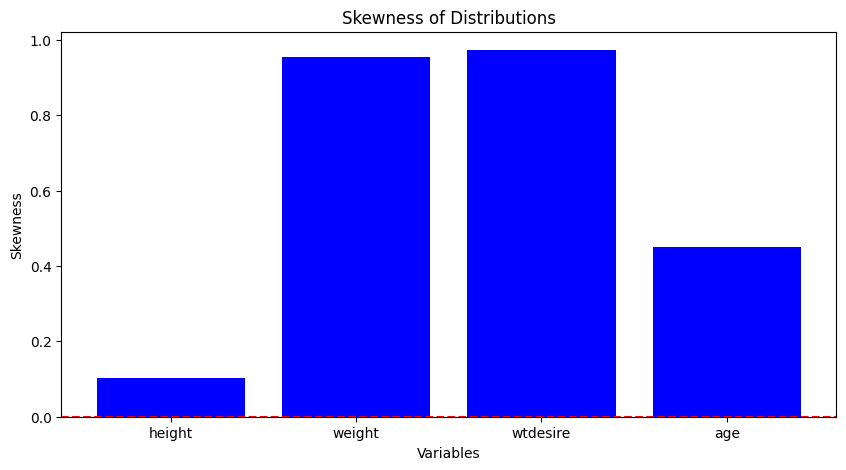

In [356]:
plt.figure(figsize=(10, 5))
plt.bar(skew.index, skew.values, color='blue')
plt.title('Skewness of Distributions')
plt.ylabel('Skewness')
plt.xlabel('Variables')
plt.axhline(0, color='red', linestyle='--') 
plt.show()

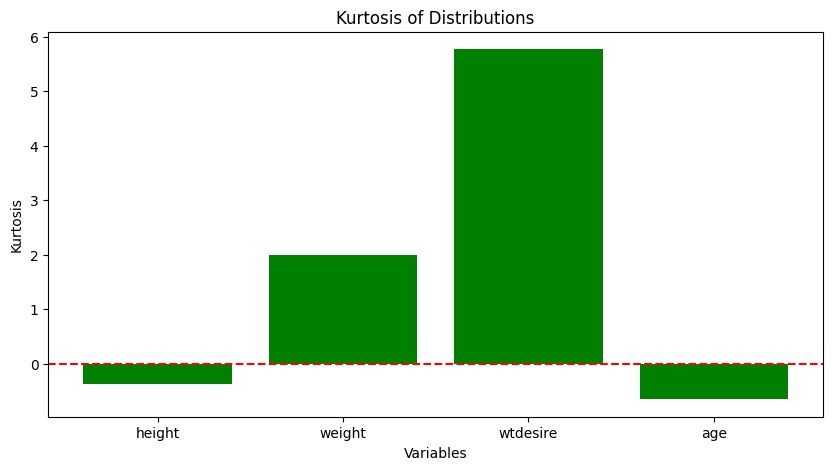

In [357]:
plt.figure(figsize=(10, 5))
plt.bar(kurto.index, kurto.values, color='green')
plt.title('Kurtosis of Distributions')
plt.ylabel('Kurtosis')
plt.xlabel('Variables')
plt.axhline(0, color='red', linestyle='--')  
plt.show()

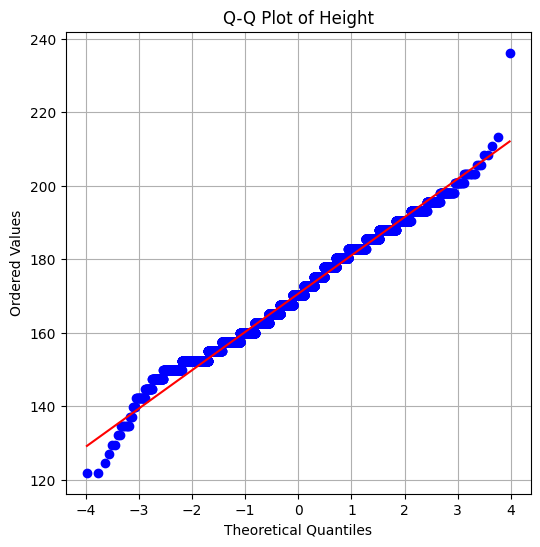

In [358]:
data = df['height'].dropna()  

plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Height')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

Đa số điểm của Height đều nằm trên đường đỏ vậy Height gần phân phối chuẩn nhất

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

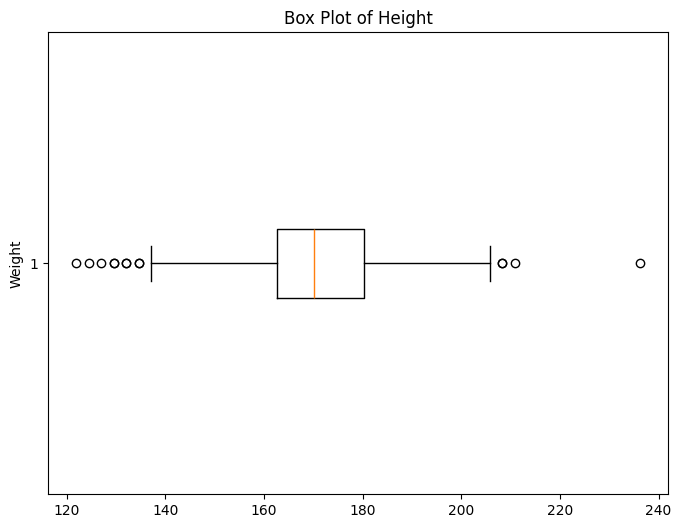

In [359]:
new_df = df[df["exerany"] == 1]


data = new_df["height"]

plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False)
plt.title('Box Plot of Height')
plt.ylabel('Weight')
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [360]:
age_series = df["age"]

print("Tuổi trung bình:", age_series.mean())
print("Độ lệch chuẩn:", age_series.std())
print("Phân vị 25%:", age_series.quantile(0.25))
print("Phân vị 50%:", age_series.quantile(0.5))
print("Phân vị 75%:", age_series.quantile(0.75))

Tuổi trung bình: 45.06825
Độ lệch chuẩn: 17.19268947448503
Phân vị 25%: 31.0
Phân vị 50%: 43.0
Phân vị 75%: 57.0


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [361]:
smoke_df = df[df["smoke100"] == 1]

smoke_rate = len(smoke_df) / len(df)
print("Tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá:", smoke_rate * 100)

Tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá: 47.205000000000005


In [362]:
smoke_df = smoke_df.copy()

bins = [0, 18, 35, 50, 65, 100]
labels = ["0-18", "19-35", "36-50", "51-65", "66+"]
smoke_df['age_group'] = pd.cut(smoke_df['age'], bins=bins, labels=labels, right=False)

smoke_df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,age_group
1,0,1,1,162.56,56.699000,52.163080,33,f,good,19-35
2,1,1,1,152.40,47.627160,47.627160,49,f,good,36-50
8,0,1,1,165.10,68.038800,58.966960,27,f,good,19-35
10,1,1,1,175.26,84.368112,79.378600,46,m,excellent,36-50
11,1,1,1,175.26,76.203456,67.131616,62,m,fair,51-65


In [363]:
smoke_df = smoke_df["age_group"].value_counts().reset_index()


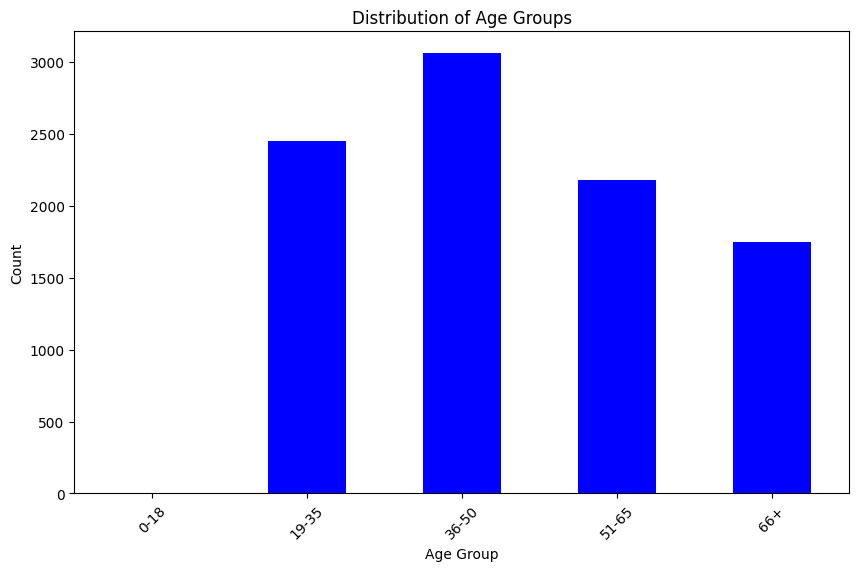

In [364]:
age_order = {
    "0-18": 0,
    "19-35": 1,
    "36-50": 2,
    "51-65": 3,
    "66+": 4
}

smoke_df['age_order'] = smoke_df['age_group'].map(age_order)
smoke_df = smoke_df.sort_values(by='age_order')

smoke_df.plot(kind='bar', x='age_group', y='count', figsize=(10, 6), legend=False, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)  
plt.show()

Đạt cao điểm ở 36-50 giảm dần về 2 bên

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [365]:
df["BMI"] = df["weight"] / ((df["height"] / 100)  ** 2)
df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,BMI
0,0,1,0,177.80,79.378600,79.378600,77,m,good,25.109607
1,0,1,1,162.56,56.699000,52.163080,33,f,good,21.455963
2,1,1,1,152.40,47.627160,47.627160,49,f,good,20.506179
3,1,1,0,167.64,59.874144,56.245408,42,f,good,21.305121
4,0,1,0,154.94,68.038800,58.966960,55,f,very good,28.341938


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [366]:

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(classify_bmi)
df.head()


,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,BMI,BMI_Category
0,0,1,0,177.80,79.378600,79.378600,77,m,good,25.109607,Overweight
1,0,1,1,162.56,56.699000,52.163080,33,f,good,21.455963,Normal
2,1,1,1,152.40,47.627160,47.627160,49,f,good,20.506179,Normal
3,1,1,0,167.64,59.874144,56.245408,42,f,good,21.305121,Normal
4,0,1,0,154.94,68.038800,58.966960,55,f,very good,28.341938,Overweight
